# One dimensional Ising model

The hamiltonian for the Ising model is\
\
\
$$
H = 
    -J\sum_{i=1}^N s_i s_{i+1}
    -h\sum_{i=1}^N s_i
$$
\
It describes a spin system in which atomic spins are located on the sites of a lattice and interact with their nearest neighbors, and possibly with a magnetic field (denoted as $h$). In this notebook the 1D Ising model is considered, since it has the perk of being analytically solvable even in the presence of a magnetic field, and thus compared with numerical results\
\
Simulations of a system of this kind consist in visiting different spin configurations by sampling the probability distribution\
\
$$
P=\frac{e^{-H/(k_BT)}}{Z} 
$$
\
in the canonical ensemble with two different methods: **Metropolis** and **Gibbs** algorithms.\
\
The following simulations are run with **20** blocks of **20000** steps\
For each value of the temperature in a range between 0.5 and 2.0 (in reduced units) a simulation is run and the uncertainty is computed over the blocks, which constitute our stochastic variables

In [28]:
from array import array
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

In [29]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [30]:
def read(observable, sampling, N, Temp):
    measure = np.zeros(N)
    errors = np.zeros(N)
    mat = []
    for i in range(N):
        with open('NSL_SIMULATOR/OUTPUT/'+observable+'/'+sampling+'/'+observable.lower()+str(Temp[i])+'.dat') as f:
            data = f.readlines()
        for line in data:
            s = line.split()
            if s[0].isdigit():
                mat.append(s)
        measure[i] = mat[NBlocks - 1][2]
        errors[i] = mat[NBlocks - 1][3]
        mat = []
    return measure, errors

Agreement with theory is going to be quantified through the reduced $\chi^2$ function, defined as\
\
$$
\chi^2 = \sum_{i=1}^d \frac{(E(T_i) - O_i)^2}{\sigma_{i}^2}\
\quad
\chi^2_d = \frac{\chi^2}{d}
$$
\
where $d$ is the number of degrees of freedom, in this case coinciding with the number of temperatures simulated

In [31]:
def Chi2(T, m, func):
    chi2 = 0
    for i in range(len(T)):
        chi2 += (func(T[i]) - m[0][i])**2 / m[1][i]**2
    return chi2 / len(T)

In [32]:
NPoints = 7   #number of measurements
NBlocks = 20
T = np.linspace(.5, 2.0, NPoints)

In [33]:
points=100
T_cont = np.linspace(0.2, 2.2, points)
beta = 1/T_cont
J = 1.0
Ns = 50
h = 0.02

## Total Energy

### Measurements

In [34]:
metro = read('TOTAL_ENERGY', 'METROPOLIS', NPoints, T)
gibbs = read('TOTAL_ENERGY', 'GIBBS',  NPoints, T)

In [35]:
def total_energy(T):
    th = np.tanh(J/T)
    thN= th**Ns
    ch = 1/th
    return -J*( th + ch*thN )/( 1 + thN )

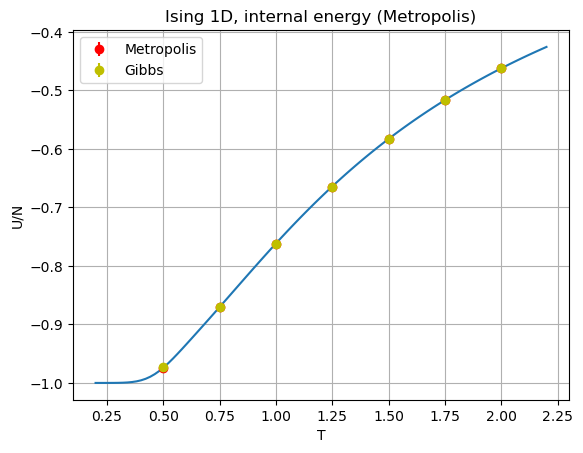

In [36]:
e = total_energy(T_cont)
plt.plot(T_cont, e)
plt.errorbar(T, metro[0], yerr=metro[1], fmt="o", color="r", label='Metropolis')
plt.errorbar(T, gibbs[0], yerr=gibbs[1], fmt="o", color="y", label='Gibbs')
plt.title('Ising 1D, internal energy (Metropolis)')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()
plt.grid()
plt.show()

### Agreement with teory

#### Metropolis

In [37]:
Chi2(T, metro, total_energy)

0.88259078757231

#### Gibbs

In [38]:
Chi2(T, gibbs, total_energy)

1.9707371515024825

## Specific Heat

### Measurements

**Fluctuation and dissipation theorem**: specific heat is calculated block-wise rather than step-wise.\
By that, we mean that there is no temporary measurement for the specific heat at every MC step, but rather once one block is completed, a value for the specific heat is computed. This reflects the nature of this observable and its link with computation, being it, by virtue of the fluctuation and dissipation theorem, related to the fluctuations of the internal energy

In [39]:
metro = read('SPECIFIC_HEAT', 'METROPOLIS', NPoints, T)
gibbs = read('SPECIFIC_HEAT', 'GIBBS',  NPoints, T)

In [40]:
def specific_heat(T):
    th = np.tanh(J/T)
    thN= th**Ns
    ch = 1/th
    return ((J/T)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

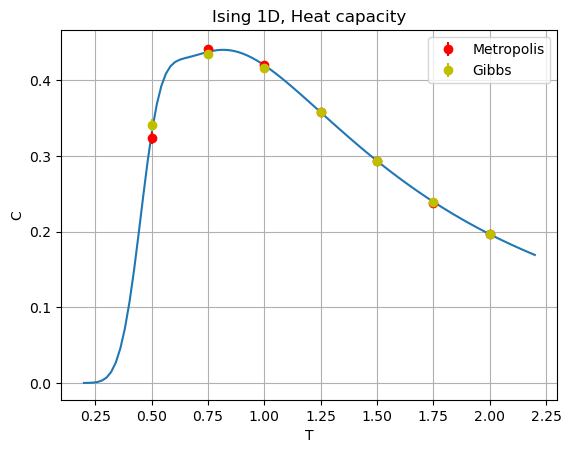

In [41]:
plt.plot(T_cont, specific_heat(T_cont))
plt.errorbar(T, metro[0], yerr=metro[1], fmt="o", color="r", label='Metropolis')
plt.errorbar(T, gibbs[0], yerr=gibbs[1], fmt="o", color="y", label='Gibbs')
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.legend()
plt.grid()
plt.show()

### Agreement with theory

#### Metropolis

In [42]:
Chi2(T, metro, specific_heat)

1.2115200003061208

#### Gibbs

In [43]:
Chi2(T, gibbs, specific_heat)

1.8565949434282716

## Susceptibility

### Measurements

In [44]:
metro = read('SUSCEPTIBILITY', 'METROPOLIS', NPoints, T)
gibbs = read('SUSCEPTIBILITY', 'GIBBS',  NPoints, T)

In [45]:
def chi(T):
    th = np.tanh(J/T)
    thN= th**Ns
    ch = 1/th
    beta = 1/T
    return beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

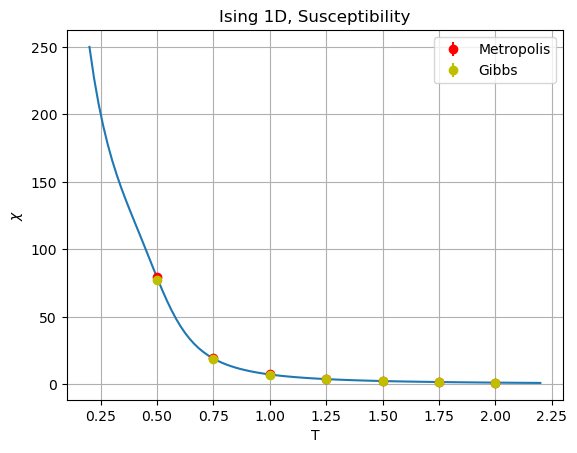

In [46]:
plt.plot(T_cont, chi(T_cont))
plt.errorbar(T, metro[0], yerr=metro[1], fmt="o", color="r", label='Metropolis')
plt.errorbar(T, gibbs[0], yerr=gibbs[1], fmt="o", color="y", label='Gibbs')
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend()
plt.grid()
plt.show()

### Agreement with theory

#### Metropolis

In [47]:
Chi2(T, metro, chi)

0.9824891669025708

#### Gibbs

In [48]:
Chi2(T, gibbs, chi)

2.70806309182491

## Magnetization

### Measurements

In [49]:
metro = read('MAGNETIZATION', 'METROPOLIS', NPoints, T)
gibbs = read('MAGNETIZATION', 'GIBBS',  NPoints, T)

In [50]:
def magnetization(T):
    b = 1/T
    l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    Z = l1**Ns + l2**Ns
    M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
    return M    

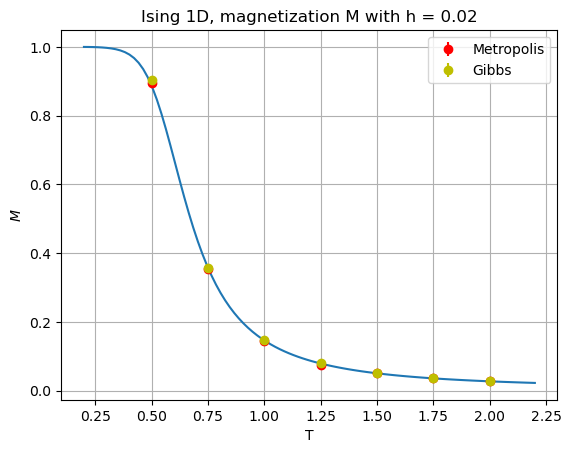

In [51]:
plt.plot(T_cont, magnetization(T_cont))
plt.errorbar(T, metro[0], yerr=metro[1], fmt="o", color="r", label='Metropolis')
plt.errorbar(T, gibbs[0], yerr=gibbs[1], fmt="o", color="y", label='Gibbs')
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.legend()
plt.grid()
plt.show()

### Agreement with theory

#### Metropolis

In [52]:
Chi2(T, metro, magnetization)

1.0817699018162572

#### Gibbs

In [53]:
Chi2(T, gibbs, magnetization)

0.3252340168833677

## Final conclusions

A common denominator among the results for the observalbes measured seems to be the fact that the most evident disagreement from theory (and between the two algorithms) appears at low temperatures, i.e. when the value for $\beta$ is high: in this situation ergodicity is lower because the algorithm encounters more resistance to performing spin flips. Even with longer equilibration times the results didn't seem to improve significantly. Even with that, though, the values for the reduced $\chi^2$ in all four cases is pretty good, with the Metropolis algorithm always outperforming Gibbs in this regard